In [1]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


### Step 1. Loading the csv file data in correct format in pandas series

In [2]:
# loading csv file into series and formating the date
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo_sales.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

### Step 2. Exploring the data and visualization regarding stationarity

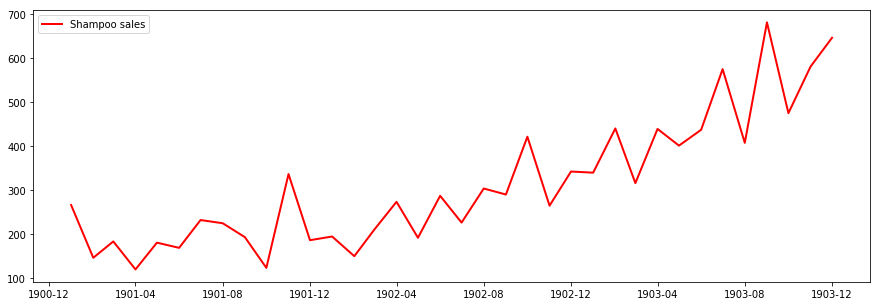

In [3]:
plt.figure(figsize=(15,5))
plt.plot(series,color='red', linewidth=2,label='Shampoo sales')
plt.legend(loc='upper left')
plt.show()

### Step 2.1 Plot rolling statistics and Dicky fuller test

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(8).mean()
    rolstd = timeseries.rolling(8).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

   

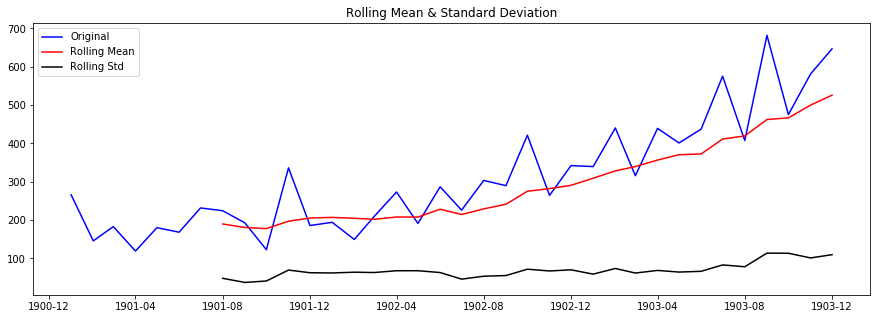

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [5]:
test_stationarity(series)

#### we can observe that the rolling mean is increasing over time. Also in dicky fuller test test-statistics is greater than critical value. so we accept the null hypothesis(H0) i.e. the timeseries is not stationary.

### Step 3:- Eliminating Trend and Seasonality

In [6]:
# Applying log function
series_log = np.log(series)
series_log.head()

Month
1901-01-01    5.583496
1901-02-01    4.982921
1901-03-01    5.210032
1901-04-01    4.781641
1901-05-01    5.194622
Name: Sales of shampoo over a three year period, dtype: float64

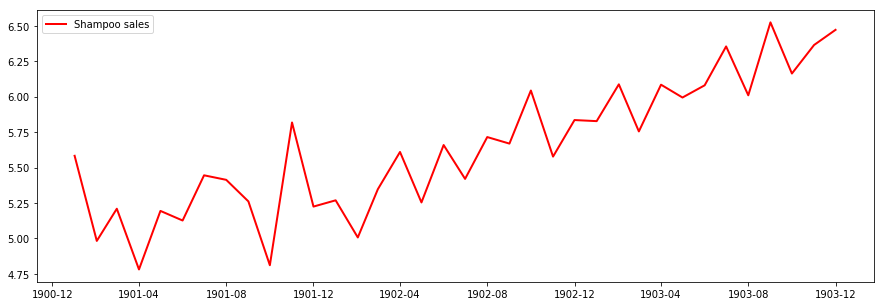

In [7]:
# visualizing the logged value
plt.figure(figsize=(15,5))
plt.plot(series_log,color='red', linewidth=2,label='Shampoo sales')
plt.legend(loc='upper left')
plt.show()

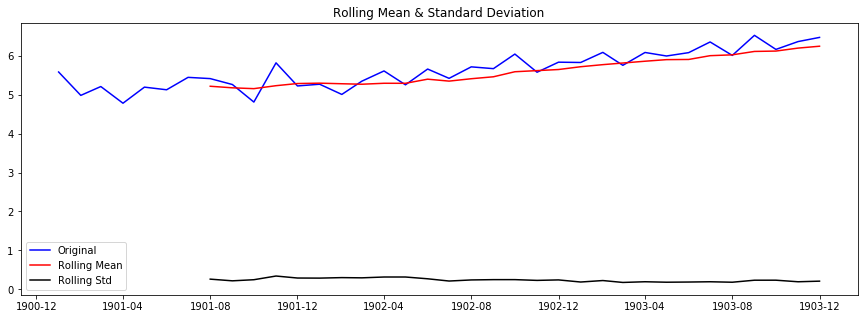

Results of Dickey-Fuller Test:
Test Statistic                  1.798463
p-value                         0.998346
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [8]:
# checking for stationarity on the logged value
test_stationarity(series_log)

#### we see that we have constant rolling standard deviation but increasing trend in the rolling mean. Also Test statistics is greater than critical value so we accept null hypothesis. i.e. the time series is not stationary

In [9]:
# Applying first order differencing on the log value
series_log_diff = series_log - series_log.shift(periods=1)
series_log_diff.head()

Month
1901-01-01         NaN
1901-02-01   -0.600575
1901-03-01    0.227111
1901-04-01   -0.428391
1901-05-01    0.412981
Name: Sales of shampoo over a three year period, dtype: float64

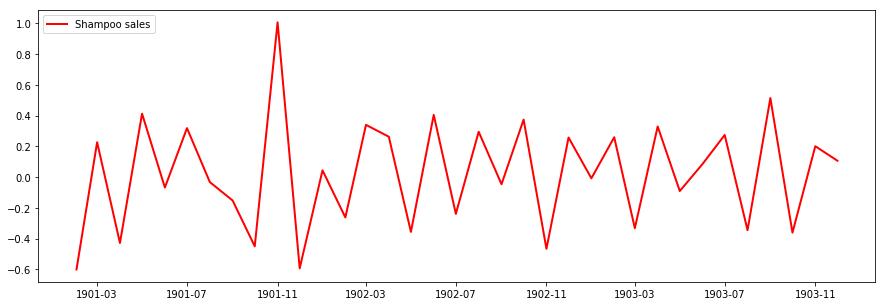

In [10]:
# visualizing the logged value
plt.figure(figsize=(15,5))
plt.plot(series_log_diff[1:],color='red', linewidth=2,label='Shampoo sales')
plt.legend(loc='upper left')
plt.show()

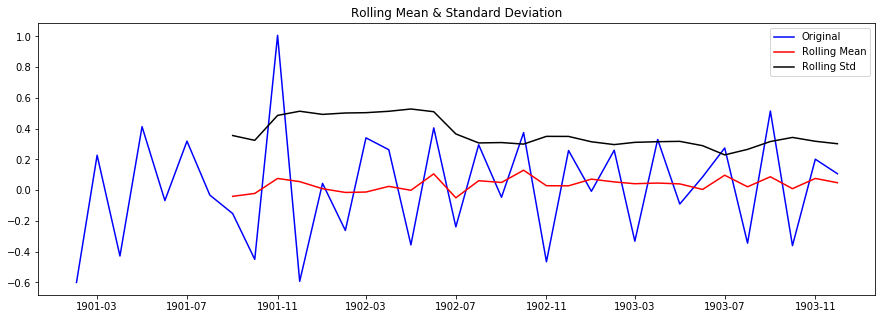

Results of Dickey-Fuller Test:
Test Statistic                 -2.168202
p-value                         0.217988
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [11]:
# checking for stationarity on the first order differential logged value
test_stationarity(series_log_diff[1:])

#### we see that we have constant rolling mean but fluctuating trend in the rolling standard deviation. Also Test statistics is greater than critical value so we accept null hypothesis. i.e. the time series is not stationary

In [12]:
# Applying second order differencing on the log value
series_log_diff_sec = series_log_diff - series_log_diff.shift(periods=1)
series_log_diff_sec.head()

Month
1901-01-01         NaN
1901-02-01         NaN
1901-03-01    0.827686
1901-04-01   -0.655502
1901-05-01    0.841372
Name: Sales of shampoo over a three year period, dtype: float64

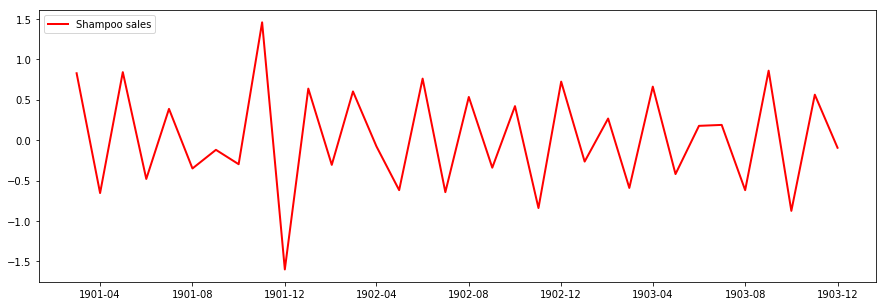

In [13]:
# visualizing the logged value
plt.figure(figsize=(15,5))
plt.plot(series_log_diff_sec[1:],color='red', linewidth=2,label='Shampoo sales')
plt.legend(loc='upper left')
plt.show()

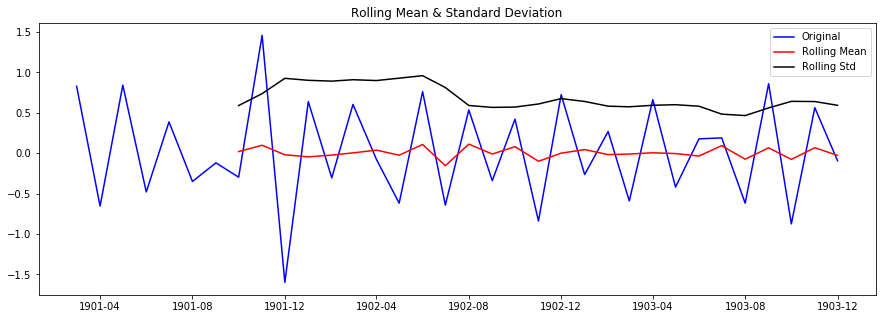

Results of Dickey-Fuller Test:
Test Statistic                 -3.796140
p-value                         0.002947
#Lags Used                     10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [14]:
# checking for stationarity on the first order differential logged value
test_stationarity(series_log_diff_sec[2:])

#### we see that Test statistics is greater than critical value so we reject null hypothesis. i.e. we can say with 99 % confidence level that the time series is stationary

### Step 4:- Forecasting a Time Series

 The data on which we will do the the forecast is second order differenced logged value

In [15]:
series_log_diff_sec.values[2:]

array([ 0.82768585, -0.65550212,  0.84137192, -0.48066718,  0.38662556,
       -0.3509384 , -0.1202231 , -0.29806004,  1.4575095 , -1.60061639,
        0.63758372, -0.30630143,  0.60239418, -0.07730073, -0.6191911 ,
        0.76132135, -0.64406395,  0.53412326, -0.34135106,  0.42069597,
       -0.84073671,  0.72406204, -0.26547096,  0.2672452 , -0.59187823,
        0.66201454, -0.42023012,  0.1766121 ,  0.18825229, -0.61934405,
        0.85969628, -0.87582683,  0.56240427, -0.09439604])

### step 4.1  plot ACF and PACF graph

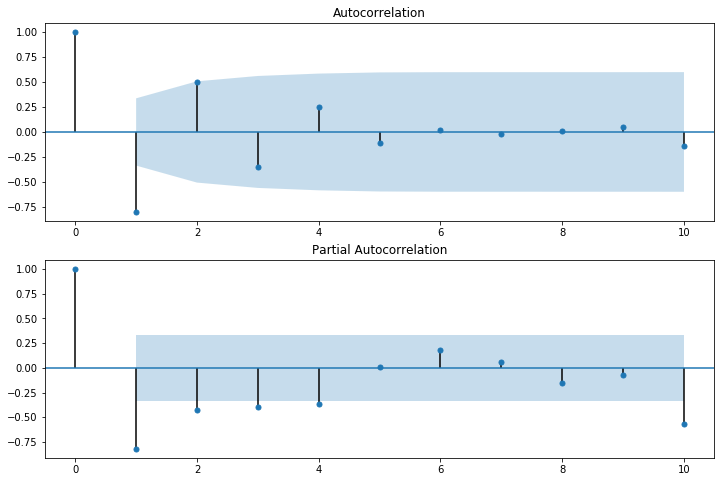

In [16]:
#ACF and PACF plots:
import statsmodels.api as sm

# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series_log_diff_sec.values.squeeze()[2:], lags=10, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series_log_diff_sec.values.squeeze()[2:], lags=10, ax=ax2)

### Observation
In ARIMA(p,d,q), p is calculated by looking from PACF plot and q is calulated from ACF plot.

from PACF plot we choose p=4

from ACF plot we choose q=1

so we will plot for 3 sets of p,d,q (4,2,0),(0,2,1) and (4,2,1)

### step 4.2 Train the model and predict the value

In [17]:
import warnings
warnings.filterwarnings('ignore')

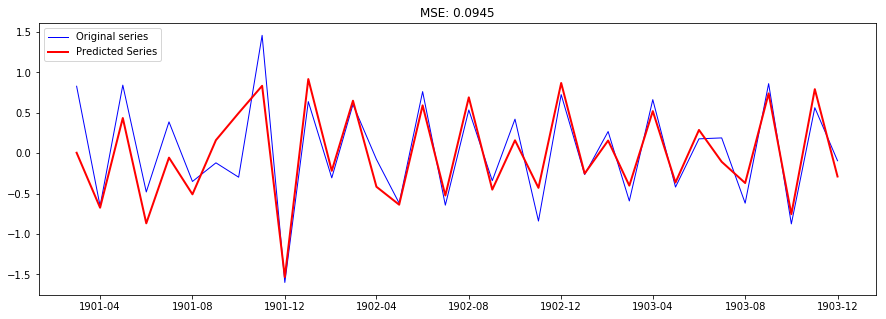

In [18]:
# for model ARIMA(4,2,0) i.e. AR Model
model = ARIMA(series_log, order=(4, 2, 0))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_log_diff_sec,color='blue', linewidth=1,label='Original series')
plt.plot(results_ARIMA.fittedvalues,color='red', linewidth=2,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_log_diff_sec.values[2:],results_ARIMA.fittedvalues) )
plt.show()

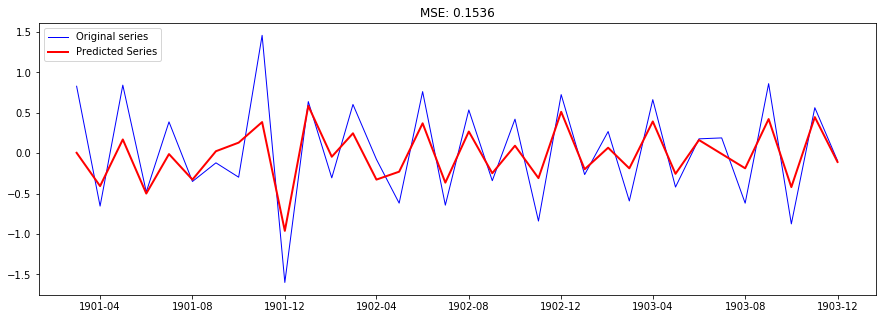

In [19]:
# for model ARIMA(0,2,1) i.e MA Model
model = ARIMA(series_log, order=(0, 2, 1))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(15,5))
plt.plot(series_log_diff_sec,color='blue', linewidth=1,label='Original series')
plt.plot(results_ARIMA.fittedvalues,color='red', linewidth=2,label='Predicted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_log_diff_sec.values[2:],results_ARIMA.fittedvalues) )
plt.show()

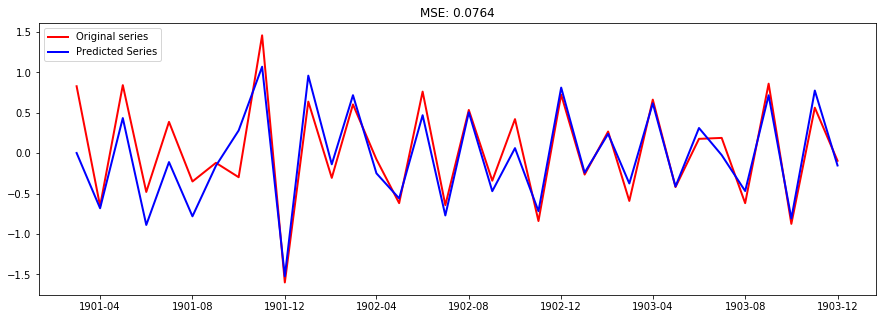

In [20]:
# for model ARIMA(4,2,1) i.e. ARIMA Model
model = ARIMA(series_log, order=(4, 2, 1))  
results_ARIMA = model.fit(disp=-1)  
#future_ARIMA =results_ARIMA.predict(start=pd.to_datetime('1904-01-01'), dynamic=False)
plt.figure(figsize=(15,5))
plt.plot(series_log_diff_sec,color='red', linewidth=2,label='Original series')
plt.plot(results_ARIMA.fittedvalues,color='blue', linewidth=2,label='Predicted Series')
#plt.plot(future_ARIMA,color='green', linewidth=2,label='Forecasted Series')
plt.legend(loc='upper left')
plt.title('MSE: %.4f'% mean_squared_error(series_log_diff_sec.values[2:],results_ARIMA.fittedvalues) )
plt.show()


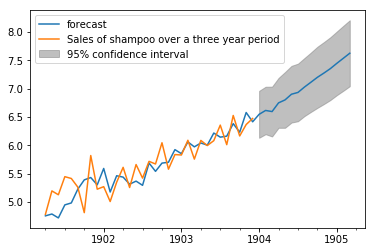

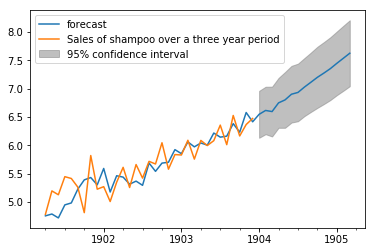

In [29]:
results_ARIMA.plot_predict(3,50)

### Observation
In ARIMA(p,d,q)

for ARIMA(4,2,0):-This is Just like AR model where MSE = 0.0945 

for ARIMA(0,2,1):-This is Just like MA model where MSE = 0.1536 

for ARIMA(4,2,1):-This is Just like ARIMA model where MSE = 0.0764

### Hence, ARIMA(4,2,1) is best model which forecasts the time series very well.